# 1. (2 pts) Write the code for downloading and formatting the data.

In [2]:
import numpy as np
import torch.nn as nn
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
import random
import torch.nn.functional as F
import time

import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def one_hot_encoding(label):
    one_hot = torch.zeros(10)
    one_hot[label] = 1
    return one_hot

new_mnist_trainset = []
for i in range(len(mnist_trainset)):
    image, label = mnist_trainset[i]
    new_image = torch.flatten(image)
    new_label = one_hot_encoding(label)
    new_mnist_trainset.append((new_image, new_label))
    
# replace the original train set with the new one
mnist_trainset = new_mnist_trainset

# create new tensors and labels for each image in the test set
new_mnist_testset = []
for i in range(len(mnist_testset)):
    image, label = mnist_testset[i]
    new_image = torch.flatten(image)
    new_label = one_hot_encoding(label)
    new_mnist_testset.append((new_image, new_label))
    
# replace the original test set with the new one
mnist_testset = new_mnist_testset

# 2. (5 pts) Write the code for minibatch SGD implementation for your linear MNIST classifier.

In [92]:
class minibatch_SGD(): 

  def __init__(self, itr, batchSize, learningRate):      
    self.itr = itr
    self.batchSize = batchSize
    self.learningRate = learningRate
    self.W = torch.zeros((10,784))
        
  def forward(self,x):
    return torch.matmul(x,torch.t(self.W))

  def loss(self, y_pred, y):
    error = y - y_pred
    return torch.sum(torch.square(error))/2

  def backward(self, X, y_pred, y):
    diff = y_pred - y
    grad = torch.matmul(torch.t(diff),X)
    return grad

  def returnMiniBatch(self, data, BatchSize):
    #without replacement
    # indices = random.sample(range(len(data)), BatchSize)
    # with replacement
    indices = torch.randint(len(data), size=(BatchSize,), dtype=torch.int64)
    subset = torch.utils.data.Subset(data, indices)
    dataloader = torch.utils.data.DataLoader(subset, batch_size=BatchSize, shuffle=True)
    return dataloader

  def train(self, trainset):
      self.W = torch.zeros((10,784))
      start_time = time.time()
      trainingLoss=[]
      for epoch in range(self.itr):
          running_loss = 0.0
          # For splitting the entire data into minibatches
#             traindata = torch.utils.data.DataLoader(dataset=trainset, batch_size=self.batchSize, shuffle=True)
          traindata = self.returnMiniBatch(data=trainset,BatchSize=self.batchSize)
          # print("here")
          for i, (image,label) in enumerate(traindata):
              y_pred = self.forward(image)
              loss = self.loss(y_pred,label)
              running_loss += loss
              dw = self.backward(image, y_pred, label)
          trainingLoss.append(running_loss.item())
          dw /= self.batchSize
          self.W -= self.learningRate * dw

      end_time = time.time()
      elapsed_time = end_time - start_time
      print("Total training time for the model: {:.2f} seconds".format(elapsed_time))
      return self.W,trainingLoss

  def test(self,testset):
      correct=0
      totalSize = len(testset)
      accuracies=[]
      testdata = torch.utils.data.DataLoader(dataset=testset, batch_size=totalSize, shuffle=False)
      for i, (image, label) in enumerate(testdata):
          y_pred = self.forward(image)
          y_pred = torch.argmax(y_pred, dim=1)
          y_true = torch.argmax(label, dim=1)
          for i in range(totalSize):
            if y_pred[i] == y_true[i]:
              correct += 1
            accuracy = correct / (i+1)
            accuracies.append(accuracy)
          correct = torch.sum(y_pred == y_true)
          accuracy = correct.item()/totalSize
          print('Accuracy of the model(itr =',self.itr,', batchSize =',self.batchSize,', lr =',self.learningRate,') =',accuracy)
      return accuracy,accuracies

In [93]:
miniSGD = minibatch_SGD(1000, 1, 0.01)
w,trainingLoss = miniSGD.train(mnist_trainset)
acc,accs = miniSGD.test(testset=mnist_testset)
print(len(accs))

Total training time for the model: 0.55 seconds
Accuracy of the model(itr = 1000 , batchSize = 1 , lr = 0.01 ) = 0.719
10000


# 3. (7 pts) The role of batch size:
Run your code with batch sizes B = 1, 10, 100, 1000. For each batch size,<br>
• determine a good choice of learning rate <br>
• pick ITR sufficiently large to ensure the (approximate) convergence of the training loss<br>
• Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis)<br>
• Report how long the training takes (in seconds).<br>
• Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis)

Total training time for the model: 0.41 seconds
Accuracy of the model(itr = 1000 , batchSize = 1 , lr = 0.01 ) = 0.6283
Total training time for the model: 0.35 seconds
Accuracy of the model(itr = 1000 , batchSize = 1 , lr = 0.001 ) = 0.7841
Total training time for the model: 0.33 seconds
Accuracy of the model(itr = 1000 , batchSize = 1 , lr = 0.0001 ) = 0.6142
Total training time for the model: 0.43 seconds
Accuracy of the model(itr = 1000 , batchSize = 10 , lr = 0.01 ) = 0.8421
Total training time for the model: 0.41 seconds
Accuracy of the model(itr = 1000 , batchSize = 10 , lr = 0.001 ) = 0.8174
Total training time for the model: 0.40 seconds
Accuracy of the model(itr = 1000 , batchSize = 10 , lr = 0.0001 ) = 0.7628
Total training time for the model: 0.88 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.01 ) = 0.8542
Total training time for the model: 0.86 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.001 ) = 0.8205
Total training time for th

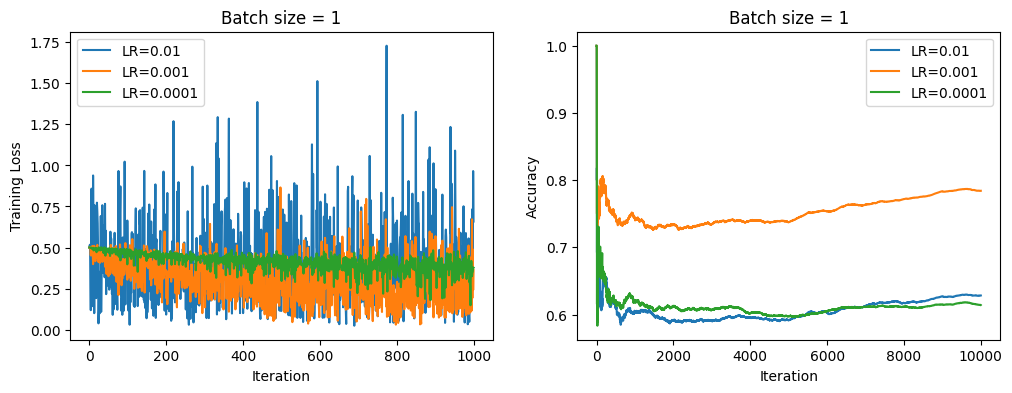

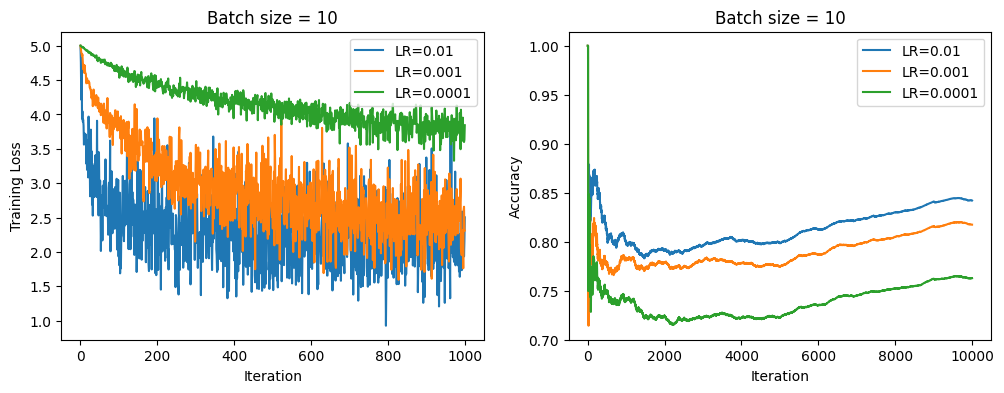

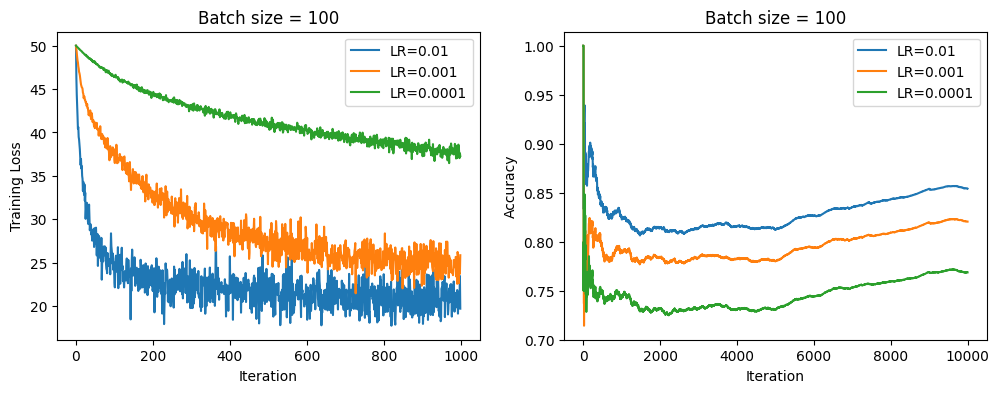

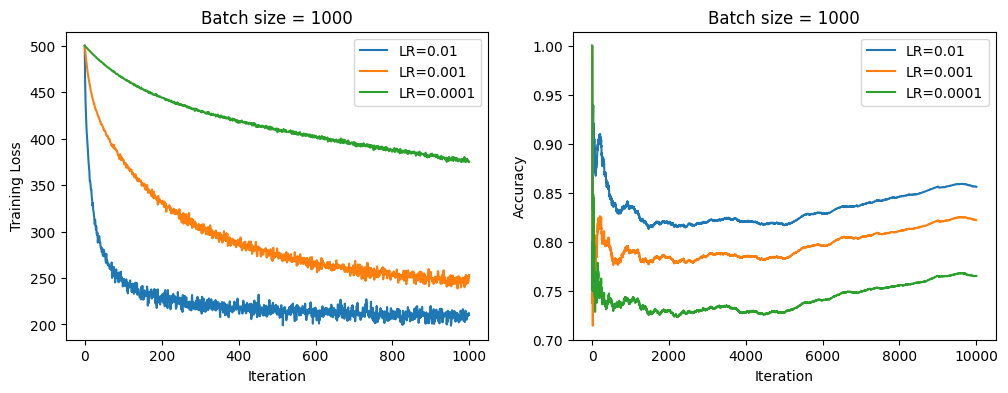

In [97]:
import matplotlib.pyplot as plt
import numpy as np

batch_sizes = [1, 10, 100, 1000]
learning_rates = [0.01, 0.001, 0.0001]

training_loss_dict = {}
accuracy_dict = {}

for batch_size in batch_sizes:
    for learning_rate in learning_rates:

        miniSGD = minibatch_SGD(itr=1000, batchSize=batch_size, learningRate=learning_rate)
        _, training_loss = miniSGD.train(mnist_trainset)
        accuracy, accuracies = miniSGD.test(testset=mnist_testset)
        
        training_loss_dict[(batch_size, learning_rate)] = training_loss
        accuracy_dict[(batch_size, learning_rate)] = accuracies

# Plot the training loss and accuracies vs. iteration for each batch size
for batch_size in batch_sizes:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for learning_rate in learning_rates:
        training_loss = training_loss_dict[(batch_size, learning_rate)]
        accuracies = accuracy_dict[(batch_size, learning_rate)]
        
        axs[0].plot(np.arange(len(training_loss)), training_loss, label=f"LR={learning_rate}")
        axs[1].plot(np.arange(len(accuracies)), accuracies, label=f"LR={learning_rate}")
    
    axs[0].set_title(f"Batch size = {batch_size}")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("Training Loss")
    axs[0].legend()
    
    axs[1].set_title(f"Batch size = {batch_size}")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()
    
    plt.show()

# 4. Comment on the role of batch size.
I have considered learning rates of 0.01, 0.001,0.0001 to test my model.For Batch size of 1, learning rate of 0.001 produced better accuracies compared to the other learning rates. But as the batch size increased learning rate = 0.01 has produced better accuracies compared to other learning rates

# 5. (6 pts) The role of training dataset size:
Let us reduce the training dataset size. Instead of N = 50, 000, let us pick a subset S′ of size N′ from the original dataset without replacement and uniformly at random. Fix batch size to B = 100. Repeat the steps above for N′ ∈ {100, 500, 1000, 10000}. Comment on the accuracy as a function of dataset size.

In [66]:
from torch.utils.data import Subset
def createSubset(dataset, subset_size):
    indices = torch.randperm(len(dataset))[:subset_size]
    return Subset(dataset, indices)

Total training time for the model: 1.18 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.01 ) = 0.6775
Total training time for the model: 1.30 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.01 ) = 0.8127
Total training time for the model: 1.31 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.01 ) = 0.8244
Total training time for the model: 1.38 seconds
Accuracy of the model(itr = 1000 , batchSize = 100 , lr = 0.01 ) = 0.8556


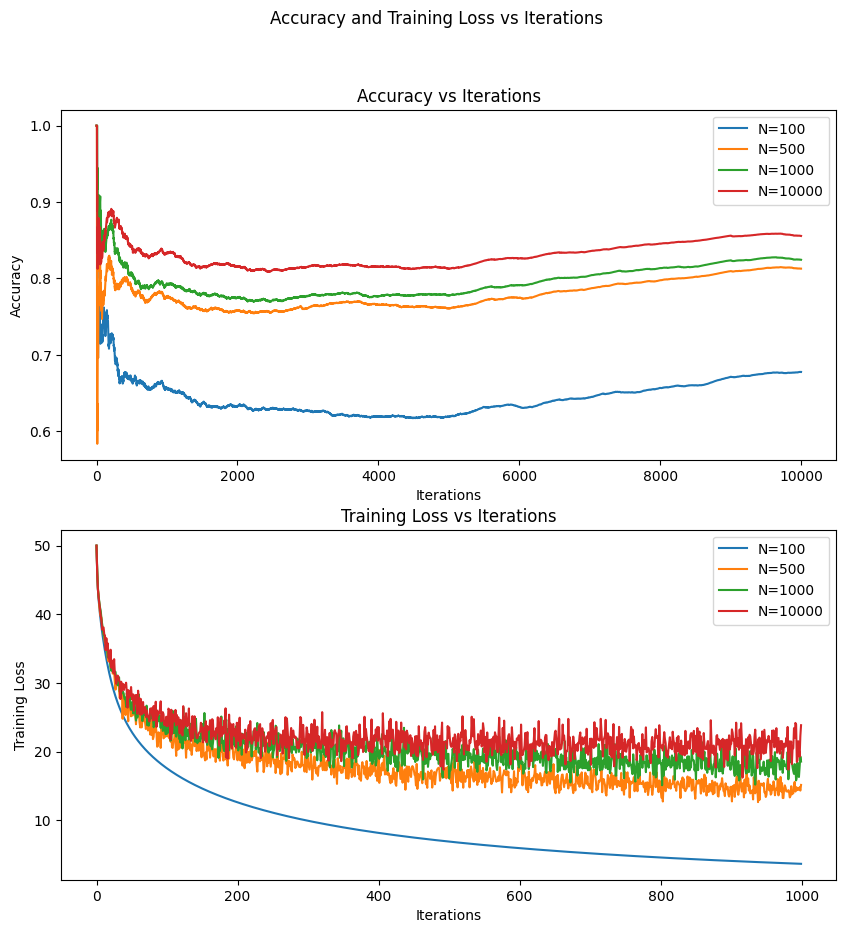

In [103]:
N=[100, 500,1000,10000]
miniSGD = minibatch_SGD(itr=1000, batchSize=100, learningRate=0.01)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Accuracy and Training Loss vs Iterations')

for size in N:
    reduced_mnist_trainset = createSubset(mnist_trainset, size)
    w,trainingloss = miniSGD.train(trainset=reduced_mnist_trainset)
    accuracy, accuracies = miniSGD.test(testset=mnist_testset)
    
    # Plotting accuracy vs iterations for the current N
    axs[0].plot(range(len(accuracies)), accuracies, label=f'N={size}')
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Accuracy vs Iterations')
    
    # Plotting training loss vs iterations for the current N
    axs[1].plot(range(len(trainingloss)), trainingloss, label=f'N={size}')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Training Loss')
    axs[1].set_title('Training Loss vs Iterations')
    
axs[0].legend()
axs[1].legend()
plt.show()


# 6. (Bonus 5 pts) Simpler Life:
Run the linear MNIST classifier with batchsize B = 100 over the full dataset by using PyTorch or Tensorflow. Use same learning rate and initialization W0 = 0. Verify that
it is consistent with your handcoded algorithm by comparing your results (the accuracy and training
loss plots).

In [4]:
# Define the batch size

model = torch.nn.Linear(784, 10)  # 784 input features, 10 output classes

loss_fn = torch.nn.MSELoss(reduction='mean')

lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Train the model
NUM_EPOCHS = 1

for epoch in range(NUM_EPOCHS):
    for i, (images, labels) in enumerate(mnist_trainset):
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [5]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for i,(images, labels) in enumerate(mnist_testset):
        outputs = model(images)
        y_pred = torch.argmax(outputs, dim=0)
        y_true = torch.argmax(labels, dim=0)
        correct = torch.sum(y_pred == y_true)
        accuracy = correct.item()
    
    print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 1.00
